In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
path = "data/wiki/"

## train Hebrew Language Model on Wiki

in this notebook i will train a model in the hebrew language, using fast.ai library. <br>
the wiki data come from prof Yoav Goldberg web: http://u.cs.biu.ac.il/~yogo/hebwiki/ - dowload Raw Sentences. <br>
after downloading: <br>

In [2]:
# ! zcat data/wiki/wikipedia.raw.gz >> data/wiki/wikipedia.txt

after that, the TextList load all the text file from givven directory (so put attention to delete any unwanted text file inside this folder)

In [16]:
src = TextList.from_folder(path, vocab=wiki_data.vocab).random_split_by_pct(0.1).label_for_lm(ignore_empty=True)

In [18]:
wiki_data = src.databunch(bs=48)

In [19]:
# create the model from the data
learn_generate = language_model_learner(wiki_data, AWD_LSTM)

# i allready start to train the model before, so i load pre-train weight.
learn_generate.load("heb_model_save_0")

In [22]:
# save the model and the data
wiki_data.save('wiki_data_old.pkl')

## train the model

In [31]:
# we unfreeze all the model, beacuse he have totally random weight.
learn_generate.unfreeze()
learn_generate.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
1,5.287219,6.027393,0.160286,3:01:02


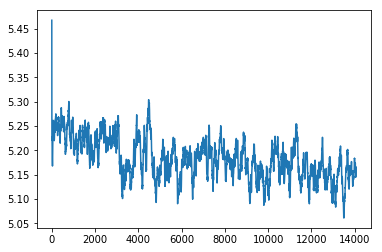

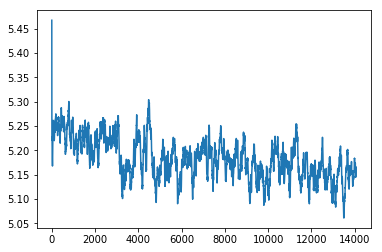

In [45]:
Wlearn_generate.load('heb_model_save_1')
learn_generate.recorder.plot_losses()

In [33]:
learn_generate.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
1,5.237288,6.671744,0.166629,3:01:26


epoch,train_loss,valid_loss,accuracy,time
1,5.237288,6.671744,0.166629,3:01:26


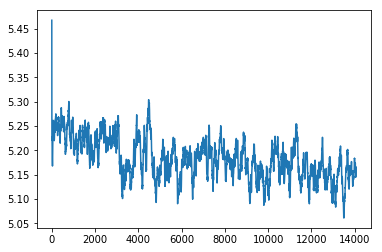

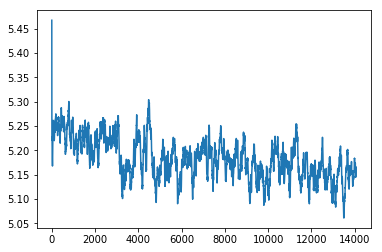

In [46]:
learn_generate.save('heb_model_save_2')
learn_generate.recorder.plot_losses()

##  results

the result seem very promising! <br>
whithout touch the data at all, and with 3 epoch, we achive very Reasonable results.

In [77]:
TEXT = "במהלך השנה 1948 קמה מדינת ישראל"
N_WORDS = 40
N_SENTENCES = 1
print("\n".join(learn_generate.predict(TEXT, N_WORDS, temperature=0.9) for _ in range(N_SENTENCES)))

במהלך השנה 1948 קמה מדינת ישראל מחוץ לישראל . 
  לאחר מספר שנים הצטרף יעקב שהצטברו באחד מראשי המועצה . 
  ביום הוקם ( 14 במאי 2009 ) . 
  בשנת הלימודים , מנחם יצא לאור בישראל , בה קבע בין היתר את ספרו " ערכים
במהלך השנה 1948 קמה מדינת ישראל מחוץ לישראל . 
  לאחר מספר שנים הצטרף יעקב שהצטברו באחד מראשי המועצה . 
  ביום הוקם ( 14 במאי 2009 ) . 
  בשנת הלימודים , מנחם יצא לאור בישראל , בה קבע בין היתר את ספרו " ערכים
